<a href="https://colab.research.google.com/github/hothienlac/CS441/blob/master/Assignment%201/Assigment%201%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The popular plotting libraries for Data visualization

===================================================================================================
- $\textbf{Cấp 1: Matplotlib & pandas.}$ Dùng để vẽ các dữ liệu một cách tự do với hơi hướng xử lý đơn giản
- $\textbf{Cấp 2: Seaborn.}$ Dùng khi xử lý các yêu cầu phức tạp hơn; với giao diện kết quả sắc nét hơn
- $\textbf{Cấp 3: ggplot & ploty.}$ Có thể tạo ra những hình vẽ có tính tương tác tốt (interactive plots)

Dưới đây là các chuyên đề và BT tương ứng của phần "Data visualization" này.

===================================================================================================

===================================================================================================
# Topic 1. Line Charts
===================================================================================================

===================================================================================================
$\textbf{Target 1. }\textit{Answer the following question}$

Từ dữ liệu "Museums_and_Galleries_monthly_visits_April_to_June.csv"; hãy thực hiện lần lượt các yêu cầu sau

- 1) Loading dataset and display the first 5 rows

- 2) Extract the sub-dataframe which have the number of visitors more than 750000

- 3) How many visitors did the "NATIONAL GALLERY"

- 4) In October 2018, how many more visitors did "(RA) FORT NELSON"? 

- 5) Does "NATIONAL MUSEUMS LIVERPOOL" receive more visitors than the "TATE LIVERPOOL" in 2018? 

===================================================================================================

In [0]:
# your code here

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

In [3]:
data = pd.read_excel('https://github.com/hothienlac/CS441/blob/master/Assignment%201/dataset/Museums_and_Galleries_monthly_visits_April_to_June.xlsx?raw=true',sheet_name='Sheet1',index_col=0)
data.head()

,museum,year,month,visits
0,TOTAL VISITOR FIGURES,2004,4,0
1,TOTAL VISITOR FIGURES,2004,5,0
2,TOTAL VISITOR FIGURES,2004,6,0
3,TOTAL VISITOR FIGURES,2004,7,0
4,TOTAL VISITOR FIGURES,2004,8,0


In [4]:
visited = data.groupby('museum').agg({'visits': "sum"})
visited.head()

,visits
museum,
(IWM) CHURCHILL WAR ROOMS,1229649
(IWM) DUXFORD,1227263
(IWM) HMS BELFAST,826301
(IWM) LONDON,2686720
(IWM) NORTH,847654


In [5]:
top = visited[visited['visits']>750000]
top

,visits
museum,
(IWM) CHURCHILL WAR ROOMS,1229649
(IWM) DUXFORD,1227263
(IWM) HMS BELFAST,826301
(IWM) LONDON,2686720
(IWM) NORTH,847654
(NHM) SOUTH KENSINGTON,13583304
(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON),2763626
"(SMG) MUSEUM OF SCIENCE AND INDUSTRY, MANCHESTER",1130082
(SMG) NATIONAL MEDIA MUSEUM,1657280


In [6]:
visited.loc['NATIONAL GALLERY']

visits    15913093
Name: NATIONAL GALLERY, dtype: int64

In [0]:
October_2018 = data.groupby('year').get_group(2018).groupby('month').get_group(10).groupby('museum').agg({'visits': "sum"})

In [0]:
FORT_NELSON_October_2018 = October_2018.loc['(RA) FORT NELSON']

In [9]:
FORT_NELSON_October_2018

visits    1588
Name: (RA) FORT NELSON, dtype: int64

In [0]:
_2018 = data.groupby('year').get_group(2018).groupby('museum').agg({'visits': "sum"})

In [11]:
NATIONAL_MUSEUMS_LIVERPOOL_2018 = _2018.loc['NATIONAL MUSEUMS LIVERPOOL']
NATIONAL_MUSEUMS_LIVERPOOL_2018

visits    822821
Name: NATIONAL MUSEUMS LIVERPOOL, dtype: int64

In [12]:
TATE_LIVERPOOL_2018 = _2018.loc['TATE LIVERPOOL']
TATE_LIVERPOOL_2018

visits    141437
Name: TATE LIVERPOOL, dtype: int64

`"NATIONAL MUSEUMS LIVERPOOL" receive more visitors than the "TATE LIVERPOOL" in 2018`

===================================================================================================

$\textbf{Target 2. }$ The _"(IWM) LONDON"_  claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again. The other local museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.

Hint:

- 1) Suppose that the local museum here contains the word 'LONDON'

- 2) To show the museum board how the event compared to regular traffic at each museum, create a line chart that shows how the number of visitors to each museum evolved over time (until 2014).

===================================================================================================

In [0]:
# your code here

In [14]:
IWM_LONDON = data[data['museum'] == '(IWM) LONDON']
IWM_LONDON.head()

,museum,year,month,visits
960,(IWM) LONDON,2004,4,14106
961,(IWM) LONDON,2004,5,11716
962,(IWM) LONDON,2004,6,12947
963,(IWM) LONDON,2004,7,13023
964,(IWM) LONDON,2004,8,13214


In [15]:
month_int_to_short = {1: "Jan",
                       2: "Feb",
                       3: "Mar",
                       4: "Apr",
                       5: "May",
                       6: "Jun",
                       7: "Jul",
                       8: "Aug",
                       9: "Sep",
                       10: "Oct",
                       11: "Nov",
                       12: "Dec"
                      }

IWM_LONDON['month'] = IWM_LONDON['month'].map(month_int_to_short)
IWM_LONDON['year'] = IWM_LONDON['year'].astype(str)
IWM_LONDON['month'] = IWM_LONDON['month'].astype(str)

IWM_LONDON['month_year'] = IWM_LONDON['month'] + " - " + IWM_LONDON['year']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [16]:
px.line(IWM_LONDON, x="month_year", y="visits")

===================================================================================================

$\textbf{Target 3.}$
When meeting with the employees at _"TATE ST IVES"_, you hear that one major pain point is that the number of museum visitors varies greatly with the seasons, with low seasons (when the employees are perfectly staffed and happy) and also high seasons (when the employees are understaffed and stressed). You realize that if you can predict these high and low seasons, you can plan ahead to hire some additional seasonal employees to help out with the extra work.

__Step 1.__ _Create a line chart that shows how the number of visitors to Avila Adobe has evolved over time_. 


__Step 2.__ _Does "TATE ST IVES" get more visitors:_ Using this information, when should the museum staff additional seasonal employees?

===================================================================================================

In [17]:
TATE_ST_IVES = data[data['museum'] == 'TATE ST IVES']
TATE_ST_IVES.head()

,museum,year,month,visits
6528,TATE ST IVES,2004,4,4711
6529,TATE ST IVES,2004,5,4056
6530,TATE ST IVES,2004,6,5273
6531,TATE ST IVES,2004,7,6717
6532,TATE ST IVES,2004,8,7676


In [18]:
month_int_to_short = {1: "Jan",
                       2: "Feb",
                       3: "Mar",
                       4: "Apr",
                       5: "May",
                       6: "Jun",
                       7: "Jul",
                       8: "Aug",
                       9: "Sep",
                       10: "Oct",
                       11: "Nov",
                       12: "Dec"
                      }

TATE_ST_IVES['month'] = TATE_ST_IVES['month'].map(month_int_to_short)
TATE_ST_IVES['year'] = TATE_ST_IVES['year'].astype(str)
TATE_ST_IVES['month'] = TATE_ST_IVES['month'].astype(str)

TATE_ST_IVES['month_year'] = TATE_ST_IVES['month'] + " - " + TATE_ST_IVES['year']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [19]:
px.line(TATE_ST_IVES, x="month_year", y="visits")

===================================================================================================

# Topic 2.  Bar Charts

===================================================================================================

### Scenario

You've recently decided to create your very own video game!  As an avid reader of [IGN Game Reviews](https://www.ign.com/reviews/games), you hear about all of the most recent game releases, along with the ranking they've received from experts, ranging from 0 (_Disaster_) to 10 (_Masterpiece_).

===================================================================================================
#### Viewing dataset

===================================================================================================

$\textbf{Target 1.}$ _Answers these following questions :_

- 1) Using ign_scores.csv for this target

- 1) What is the highest average score received by PC games?

- 2) On the "PlayStation Vita" platform, which genre has the lowest average score?

===================================================================================================

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/hothienlac/CS441/master/Assignment%201/dataset/ign_scores.csv')
data.head()

,Platform,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
0,Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
1,Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
2,Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
3,GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
4,Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


In [23]:
PC_game = data[data['Platform'] == 'PC'].drop('Platform', axis=1).transpose()
PC_game.rename(columns={PC_game.columns[0]: 'Score'}).sort_values('Score')

,Score
Action,6.805791
Sports,6.902424
Puzzle,6.924706
Racing,7.032418
Shooter,7.084878
Simulation,7.104889
Adventure,7.136798
Fighting,7.166667
Strategy,7.310207
"Action, Adventure",7.334746


In [24]:
# PlayStation_Vita = data[data['Platform'] == 'PlayStation Vita'].drop('Platform', axis=1).transpose().rename(columns={PlayStation_Vita.columns[0]: 'Score'})
# PlayStation_Vita.sort_values('Score')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 13 columns):
Platform             21 non-null object
Action               21 non-null float64
Action, Adventure    21 non-null float64
Adventure            21 non-null float64
Fighting             21 non-null float64
Platformer           21 non-null float64
Puzzle               21 non-null float64
RPG                  21 non-null float64
Racing               21 non-null float64
Shooter              21 non-null float64
Simulation           21 non-null float64
Sports               21 non-null float64
Strategy             21 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.3+ KB


===================================================================================================

$\textbf{Target 2.}$ Since you can remember, your favorite video game has been [**Mario Kart Wii**](https://www.ign.com/games/mario-kart-wii), a racing game released for the Wii platform in 2008.  And, IGN agrees with you that it is a great game -- their rating for this game is a whopping 8.9!  Inspired by the success of this game, you're considering creating your very own racing game for the Wii platform.
#### Step 1.
Create a bar chart that shows the average score for **racing** games, for each platform.  Your chart should have one bar for each platform.

#### Step 2.
Based on the bar chart, do you expect a __racing__ game for the **Wii** platform to receive a high rating?  If not, what gaming platform seems to be the best alternative?

===================================================================================================


In [25]:
px.bar(data.sort_values('Racing'), x='Platform', y='Racing')

__Nhận xét.__
- 1) Xét về mặt _"Racing"_; các game trên _"Wii"_ còn rất yếu 
- 2) Các game trên _"Xbox One"_ được đánh giá tính _"racing"_ cao hơn cả.

===================================================================================================

__Target 3.__ Eventually, you decide against creating a racing game for Wii, but you're still committed to creating your own video game!  Since your gaming interests are pretty broad (_... you generally love most video games_), you decide to use the IGN data to inform your new choice of genre and platform.

#### Step 1.
Use the data to create a heatmap of average score by genre and platform.  

#### Step 2.
Which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings?

===================================================================================================

In [26]:
# px.imshow(data.drop('Platform',axis=1), x=list(data), y=list(data.transpose()))
x = data.set_index('Platform')
go.Figure(data=go.Heatmap(
                   z=x,
                   x=list(x),
                   y=list(x.transpose()),
                   hoverongaps = False))

# Topic 3. Inferences in Pie & count charts
__Renaming then Viewing data set.__

__Target 1.__ _Using pie and count charts_ 

Using pie chart show name of ten club have the most age

In [95]:
data = pd.read_csv('https://raw.githubusercontent.com/hothienlac/CS441/master/Assignment%201/dataset/epldata_final.csv')
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
name            461 non-null object
club            461 non-null object
age             461 non-null int64
position        461 non-null object
position_cat    461 non-null int64
market_value    461 non-null float64
page_views      461 non-null int64
fpl_value       461 non-null float64
fpl_sel         461 non-null object
fpl_points      461 non-null int64
region          460 non-null float64
nationality     461 non-null object
new_foreign     461 non-null int64
age_cat         461 non-null int64
club_id         461 non-null int64
big_club        461 non-null int64
new_signing     461 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [98]:
age = data[['club','age']]
age.head()

,club,age
0,Arsenal,28
1,Arsenal,28
2,Arsenal,35
3,Arsenal,28
4,Arsenal,31


In [103]:
top = age.groupby('club').mean().sort_values('age').head(10)
top

,age
club,
Liverpool,24.777778
Southampton,24.956522
Manchester+United,25.560000
Tottenham,25.650000
Huddersfield,26.000000
Everton,26.214286
Newcastle+United,26.428571
Arsenal,26.678571
Bournemouth,26.875000


In [106]:
px.bar(top, x=top.index, y='age')

__Target 2.__
using catplot number of people in each postion

# Topic 4. Histogram
We have 2 dataset in this Section: The data file corresponding to benign tumors into a DataFrame called cancer_b_data; while another is corresponding to malignant tumors.

In [29]:
# Read and show Cancer_b dataset
Cancer_b = pd.read_csv('https://raw.githubusercontent.com/hothienlac/CS441/master/Assignment%201/dataset/cancer_b.csv')
Cancer_b.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [30]:
Cancer_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 32 columns):
Id                           357 non-null int64
Diagnosis                    357 non-null object
Radius (mean)                357 non-null float64
Texture (mean)               357 non-null float64
Perimeter (mean)             357 non-null float64
Area (mean)                  357 non-null float64
Smoothness (mean)            357 non-null float64
Compactness (mean)           357 non-null float64
Concavity (mean)             357 non-null float64
Concave points (mean)        357 non-null float64
Symmetry (mean)              357 non-null float64
Fractal dimension (mean)     357 non-null float64
Radius (se)                  357 non-null float64
Texture (se)                 357 non-null float64
Perimeter (se)               357 non-null float64
Area (se)                    357 non-null float64
Smoothness (se)              357 non-null float64
Compactness (se)             357 non-null float6

In [31]:
# Read and show Cancer_m dataset
Cancer_m = pd.read_csv('https://raw.githubusercontent.com/hothienlac/CS441/master/Assignment%201/dataset/cancer_m.csv')
Cancer_m.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1) The data for benign tumors, what is the largest value for 'Perimeter (mean)'?

In [32]:
Cancer_b.sort_values('Perimeter (mean)').head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
35,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382
356,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,0.3857,1.4280,2.548,19.150,0.007189,0.004660,0.00000,0.000000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039
332,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,0.00000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938
333,921362,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,0.2196,1.4790,1.445,11.730,0.015470,0.064570,0.09252,0.013640,0.02105,0.007551,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409


2) What is the value for 'Radius (mean)' for the tumor with Id 842517

In [33]:
Cancer_m[Cancer_m['Id'] == 842517]

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902


### Investigating differences
Step 1. Create 2 histograms that show the distribution in values for `'Area (mean)'` for both benign and malignant tumors

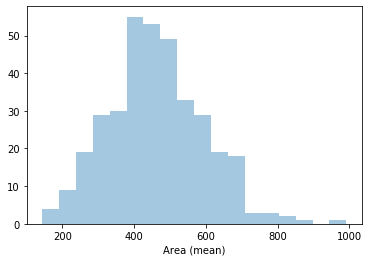

In [36]:
sns.distplot(Cancer_b['Area (mean)'], kde=False)

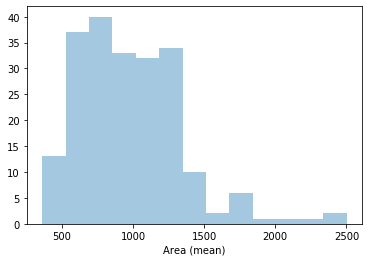

In [37]:
sns.distplot(Cancer_m['Area (mean)'], kde=False)

Step 2. A researcher approaches you for help with identifying how the `'Area (mean)'` column can be used to understand the difference between benign and malignant tumors.  Based on the histograms above, 
- Do malignant tumors have higher or lower values for `'Area (mean)'` (relative to benign tumors), on average?
- Which tumor type seems to have a larger range of potential values?

In [0]:
data = list(zip(['1']*Cancer_b.size, ['Cancer_b']*Cancer_b.size, Cancer_b['Area (mean)']))
data.extend(list(zip(['1']*Cancer_b.size,['Cancer_m']*Cancer_m.size, Cancer_m['Area (mean)'])))
compare = pd.DataFrame(data = data, columns=['x','type', 'Area (mean)'])

In [86]:
compare.head()

,x,type,Area (mean)
0,1,Cancer_b,566.3
1,1,Cancer_b,520.0
2,1,Cancer_b,273.9
3,1,Cancer_b,523.8
4,1,Cancer_b,201.9


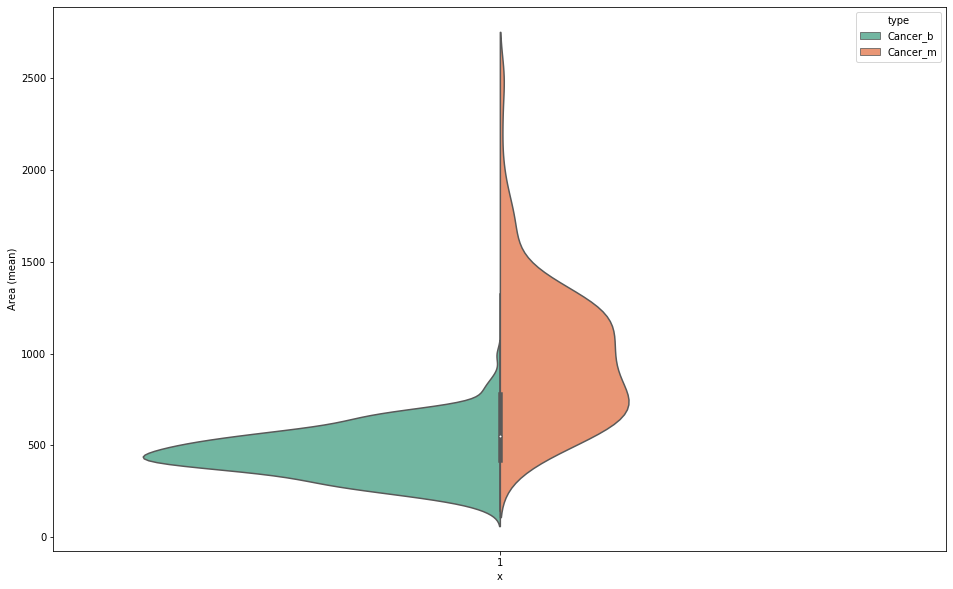

In [91]:
plt.figure(figsize=(16, 10))
sns.violinplot(x='x', y="Area (mean)", hue="type", data=compare, palette="Set2", split=True)

In [94]:
fig = px.violin(compare, y="Area (mean)", color="type",
                violinmode='overlay',
                hover_data=compare.columns)
fig.show()

### Problem. A very useful column 
#### Step 1.

Create two KDE plots that show the distribution in values for `'Radius (worst)'` for both benign and malignant tumors.  (_To permit easy comparison, create a single figure containing both KDE plots in the code cell below._)

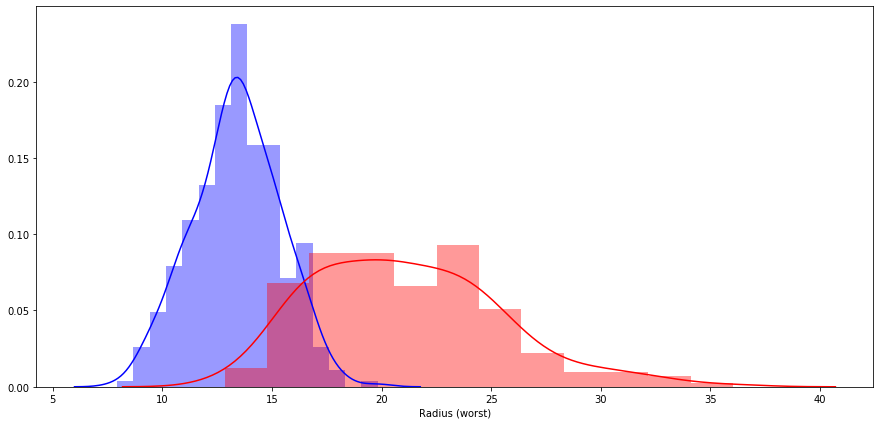

In [111]:
plt.figure(figsize=(15,7))
sns.distplot(Cancer_b['Radius (worst)'], color='blue')
sns.distplot(Cancer_m['Radius (worst)'], color='red')
plt.show()

#### Step 2.

A hospital has recently started using an algorithm that can diagnose tumors with high accuracy.  Given a tumor with a value for `'Radius (worst)'` of 25, do you think the algorithm is more likely to classify the tumor as benign or malignant?

Malignant

# Topic 5. Scatter plot & regression line
##### Review the data

In [121]:
# # read and show candy dataset
data = pd.read_csv('https://raw.githubusercontent.com/hothienlac/CS441/master/Assignment%201/dataset/candy.csv').drop('id',axis=1).set_index('competitorname')
data.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


_The dataset contains 83 rows, where each corresponds to a different candy bar. There are 13 columns:_
- __'competitorname'__ contains the name of the candy bar.
- __the next 9 columns__ (from 'chocolate' to 'pluribus') describe the candy. For instance, rows with chocolate candies have "Yes" in the 'chocolate' column (and candies without chocolate have "No" in the same column).
- __'sugarpercent'__ provides some indication of the amount of sugar, where higher values signify higher sugar content.
- __'pricepercent'__ shows the price per unit, relative to the other candies in the dataset.
- __'winpercent'__ is calculated from the survey results; higher values indicate that the candy was more popular with _survey respondents_.

__Target 1.__ Answer the questions
- 1) How many columns of 'Kit Kat' received 'Yes' in the survey
- 2) Which candy was more popular with survey respondents;: 'Kit Kat' or 'Almond Joy'?
- 3) Which candy has higher sugar content: 'Twizzlers' or '3 Musketeers'?

In [125]:
data.loc['Kit Kat']

chocolate               Yes
fruity                   No
caramel                  No
peanutyalmondy           No
nougat                   No
crispedricewafer        Yes
hard                     No
bar                     Yes
pluribus                 No
sugarpercent          0.313
pricepercent          0.511
winpercent          76.7686
Name: Kit Kat, dtype: object

In [127]:
data.loc[['Kit Kat', 'Almond Joy']]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
Kit Kat,Yes,No,No,No,No,Yes,No,Yes,No,0.313,0.511,76.768600
Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546


In [128]:
data.loc[['Twizzlers', '3 Musketeers']]['sugarpercent']

competitorname
Twizzlers       0.220
3 Musketeers    0.604
Name: sugarpercent, dtype: float64

### Target 2: The role of sugar
Do people tend to prefer candies with higher sugar content?  

#### Step1
Create a scatter plot that shows the relationship between `'sugarpercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis).  _Don't add a regression line just yet -- you'll do that in the next step!_

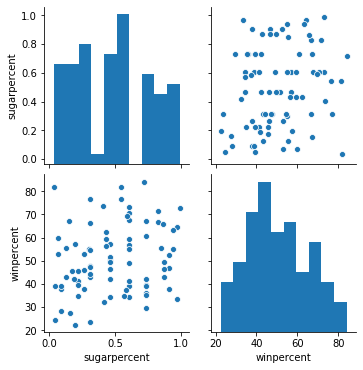

In [131]:
sns.pairplot(data[['sugarpercent', 'winpercent']])

In [0]:
import numpy as np

In [133]:
np.corrcoef(data['sugarpercent'], data['winpercent'])

array([[1.        , 0.20763498],
       [0.20763498, 1.        ]])

#### Step2
Look at the scatter plot, are candies with more sugar relatively more or less popular with the survey respondents?

- Look at the scatter plot, it is indicated a `'positively correlation'`, meaning that both variables move in the same direction together. 

- Next, the candies with more sugar (or the `'sugarpercent'`) is less popular with the survey respondents (also `'"winpercent"'`). 

- In fact, the correllation of 2 this features is equal to 0.333861.

### __Target 3 (Take a closer look)__
#### Step 1.
Add the _regression line_ to the scatter plot in a new window

#### Step2.
Explain the plot above; and what does this tell you about the candy that people tend to prefer?
Then, find the `'R2'` and `'R2adjusted'` values of this model

### __Target 4. Investigate each features__:  ___Chocolate___ 

#### Step 1

Create the same scatter plot you created above, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

##### Step 2. Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

### __Target 5.__ _Everybody loves chocolate.?_

#### Step 1.
Using swarmplot(); create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`.  Put `'chocolate'` on the (horizontal) x-axis, and `'winpercent'` on the (vertical) y-axis.

#### Step 2.

You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate.  Which plot is more appropriate to tell this story?

_=====================================================================================================================_